<a href="https://colab.research.google.com/github/Julianfried/Diplomatura-en-IA-Instituto-Humai/blob/main/Matematicas%20para%20IA/ejercicios_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/5_Optimizacion/ejercicios/ejercicios_optimizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Ejercicio 1: Método de la bisección

Implementar el método de la bisección. Debe tomar como argumentos, la función a evaluar, el intervalo inicial, y los criterios de corte. Debe devolver el valor  hallado.

Recordar que la formulación del método tiene como objetivo encontrar $\color{orange}{x}$ que iguale a cero una ecuación.

Hint: usar como base el pseudocódigo provisto en la teórica

<center>
<img src="http://www.frsn.utn.edu.ar/gie/an/enl/Metodobiseccion.gif">
</center>

In [1]:
def bisection(f, interval0, MAXITER, TOL):
    a,b = interval0[0], interval0[1] #definimos el intervalo
    fa, fb = f(a), f(b) #calculamos el valor de la función
    fc = 2*TOL #esto está solamente para que entre por primera vez al while
    cont = 1  #nuestro contador
    while (abs(fc) >= TOL) and (cont < MAXITER): #condiciones de corte
        c = (a+b)/2 #nuestro punto medio, la bisección
        fc = f(c) #valor en este punto
        if f(c) == 0: #si encontramos la solución devolver ese valor
            return c

        if f(a)*fc < 0: #manera muy ingeniosa de determinar si es creciente o decreciente la función
            b = c
        else:
            a = c

        cont += 1

    if abs(f(c)) <= TOL:
        return (a+b)/2
    else:
        print(f"El método falló despues de {MAXITER} iteraciones")
        return None


# Ejercicio 2:

Usar el método de la bisección para resolver el siguiente problema

$$
\color{orange}{x^6-4x^5+\sin (x)-e^x+\pi =0}
$$

Graficar la función en el intervalo $\color{orange}{[-1,1]}$ y usar este intervalo como el inicial

Usar `numpy`  y `matplotlib`.


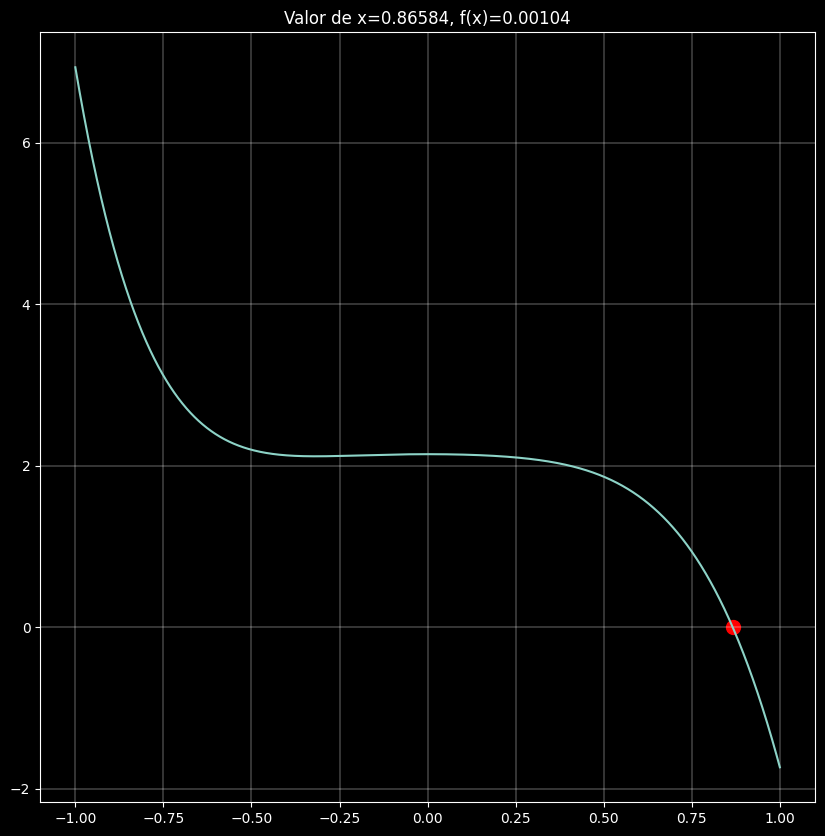

In [2]:
# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#definimos el array para graficar la función
x = np.linspace(-1,1, int(1e4))

# imlpementamos f siendo esta el lado izquierdo de la ecuación
def f(x):
    return x**6-4*(x**5)+np.sin(x) - np.exp(x) + np.pi

#calculamos los valores de f en los puntos x que definimos anteriormente
y = f(x)


#graficamos para ver como era la forma de la función
fig = plt.figure(figsize=(10,10))
_ = plt.grid(linewidth = 0.3)
_ = plt.plot(x,y)

# usamos el método del punto anterior
c = bisection(f, [-1,1], 1e6, 0.001)
fc = f(c)

_ = plt.scatter(c, f(c), s=100, c='r')
_ = plt.title(f"Valor de x={c:.5f}, f(x)={fc:.5f}")

# Ejercicio 3

Modificar el método `fit` de la clase `LinearRegression` para poder guardar el historial del valores de la función error. Graficar el error en función del tiempo.


In [3]:
# completa tu código acá

class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias #el bias es la constante de nuestro modelo lineal
        pass

    def fit(self, x, y, optimizer):

        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])

        N,D = x.shape

        def gradient(x, y, betas):
            yh =  x @ betas # la operación calcula el producto matricial
            N, D = x.shape
            grad = -2*np.dot(y-yh, x)/N
            return grad

        betas0 = np.zeros(D) #betas iniciales
        self.betas = optimizer.run(gradient, x, y, betas0) #corremos el optimizador

        #####

        def MSE(y,yh):
            e = (y-yh)**2
            return np.mean(e)

        def get_error_history(x,y,history_betas):
            error_history = []
            for betas in history_betas:
                yh = x@betas
                error_history.append(MSE(y,yh))
            return error_history

        self.error_history = get_error_history(x,y,optimizer.w_history)

        return self

    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.betas
        return yh

In [4]:
# esta celda permanece igual


class GradientDescent:

    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):

        """
        Inicializador

        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """

        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente.

        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """

        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente
            w = w - self.learning_rate * grad #acá esta la papa
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w


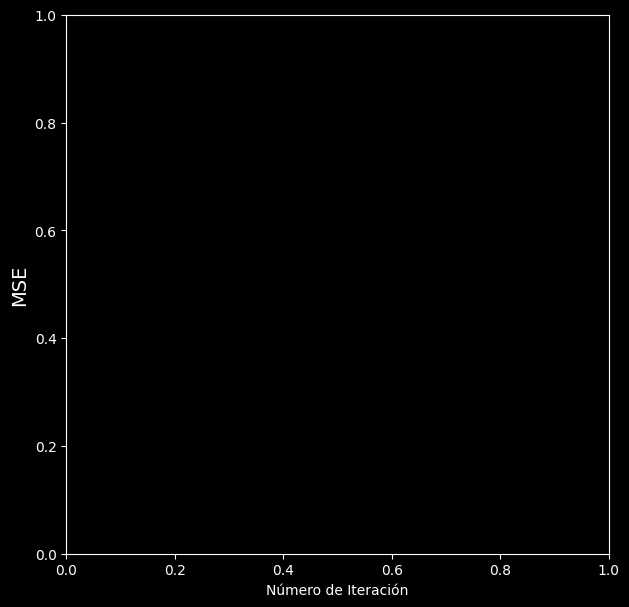

In [5]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True)
model = LinearRegression() #inicializamos nuestro objeto regresion
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))

#completar el plot
# _ = plt.plot(..., '.')

_ = plt.ylabel('MSE', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 4

Modificar el método  `run` de la clase `GradientDescent` para guardar el valor del gradiente en cada paso del entrenamiento. Graficar la evolución del mismo.

In [6]:
# completa tu código acá

class GradientDescent:

    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):

        """
        Inicializador

        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """

        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente.

        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """

        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente
            w = w - self.learning_rate * grad #acá esta la papa
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w


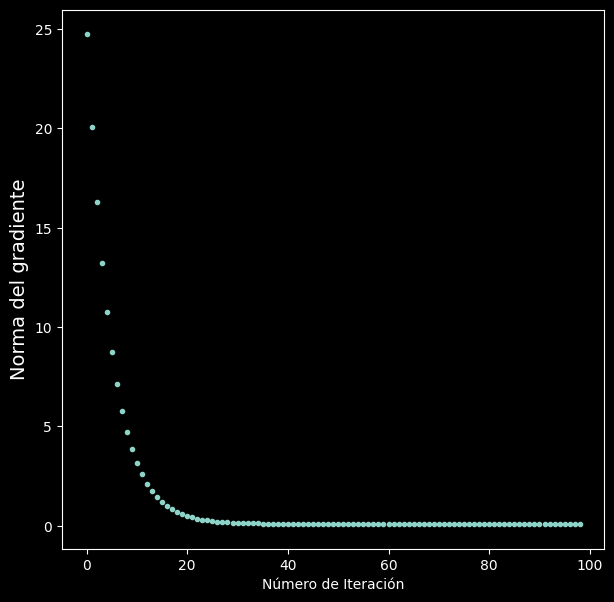

In [8]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True)
model = LinearRegression() #inicializamos nuestro objeto regresion
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))

#completa tu código aca para graficar
_ = plt.plot(np.arange(0,100-1), model.error_history, '.')

_ = plt.ylabel('Norma del gradiente', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 5

Implementar  un método que determine si la figura geométrica de un disco de radio 1 es convexa.


### Paso 1

Implementar una función que permita determinar si un punto pertenece al conjunto definido como Disco.

$$
\color{orange}{D = \{(x,y) \ : \ \|(x,y)\|_2 \leq 1 \}}
$$


In [9]:
def in_disk(x, y, radius=1):
    norm = np.sqrt(x**2 + y**2)
    if norm <= radius:
      return True

    return False

In [12]:
in_disk(5,3)

False

### Paso 2

Implementar una función que dos puntos, y construya una recta (la recta va a ser una serie de puntos pertenecientes a la recta).


In [13]:


def build_line(x1, y1, x2, y2, NUM_POINTS=100):
    xs = np.linspace(x1,x2,NUM_POINTS)
    ys = np.linspace(y1,y2,NUM_POINTS)

    return xs, ys

In [14]:
build_line(1,5,3,4)

(array([1.        , 1.02020202, 1.04040404, 1.06060606, 1.08080808,
        1.1010101 , 1.12121212, 1.14141414, 1.16161616, 1.18181818,
        1.2020202 , 1.22222222, 1.24242424, 1.26262626, 1.28282828,
        1.3030303 , 1.32323232, 1.34343434, 1.36363636, 1.38383838,
        1.4040404 , 1.42424242, 1.44444444, 1.46464646, 1.48484848,
        1.50505051, 1.52525253, 1.54545455, 1.56565657, 1.58585859,
        1.60606061, 1.62626263, 1.64646465, 1.66666667, 1.68686869,
        1.70707071, 1.72727273, 1.74747475, 1.76767677, 1.78787879,
        1.80808081, 1.82828283, 1.84848485, 1.86868687, 1.88888889,
        1.90909091, 1.92929293, 1.94949495, 1.96969697, 1.98989899,
        2.01010101, 2.03030303, 2.05050505, 2.07070707, 2.09090909,
        2.11111111, 2.13131313, 2.15151515, 2.17171717, 2.19191919,
        2.21212121, 2.23232323, 2.25252525, 2.27272727, 2.29292929,
        2.31313131, 2.33333333, 2.35353535, 2.37373737, 2.39393939,
        2.41414141, 2.43434343, 2.45454545, 2.47

### Paso 3

Implementar el método que chequee si los puntos pertenecientes a la recta pertenecen al conjunto disco. Usar puntos aleatorios asegurandose que caigan dentro de un círculo de radio 1. Esto es fácil usando coordenadas polares. Más info <a href="https://es.wikipedia.org/wiki/Coordenadas_polares"> acá</a>

In [16]:
# completa tu código acá
def is_disk_convex(NUM_POINTS = 100):
    thetas = np.random.uniform(low= -np.pi, high=np.pi, size=2)
    radiuses = np.random.random(2)
    x1,x2 = radiuses * np.cos(thetas)
    y1,y2 = radiuses * np.sin(thetas)

    xs, ys = build_line(x1,y1,x2,y2)

    for x,y in zip(xs,ys):
      if not in_disk(x,y,radius=1):
        return False
    return True

is_disk_convex()

True